# Car Price Prediction

#### Import Relevant Dependancies

In [451]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import os
import sys
import csv

from collections import defaultdict, Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

%matplotlib inline

sb.set_style('ticks')
sb.set_palette('viridis')
sb.set()

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 1000)

warnings.filterwarnings('ignore')

#### Load and Explore Data from Local Host Machine

In [452]:
df = pd.read_csv("D:\Open Classroom\Datasets\Car Price Prediction Challenge\car_price_prediction.csv")
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Data Exploration and Analysis

In [453]:
df.shape

(19237, 18)

In [454]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [455]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [456]:
outlier = df['Price'] >= 600000
df = df[~outlier]
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


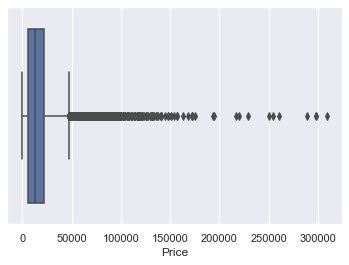

In [457]:
sb.boxplot(df['Price'])

In [458]:
round(df.describe())

,ID,Price,Prod. year,Cylinders,Airbags
count,19234.0,19234.0,19234.0,19234.0,19234.0
mean,45576503.0,17113.0,2011.0,5.0,7.0
std,936661.0,18279.0,6.0,1.0,4.0
min,20746880.0,1.0,1939.0,1.0,0.0
25%,45698360.0,5331.0,2009.0,4.0,4.0
50%,45772307.0,13172.0,2012.0,4.0,6.0
75%,45802036.0,22063.0,2015.0,4.0,12.0
max,45816654.0,308906.0,2020.0,16.0,16.0


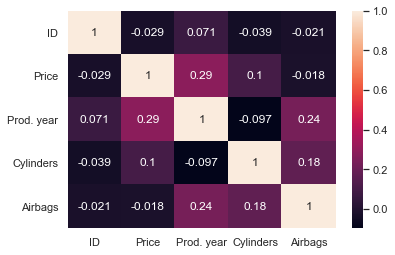

In [459]:
sb.heatmap(df.corr(), annot = True)

In [460]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [461]:
df.drop(columns = 'ID', inplace = True)

In [462]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'ROLLS-ROYCE', 'PONTIAC', 'SATURN',
       'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [463]:
df['Model'].unique()

array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [464]:
df['Category'].value_counts()

Sedan          8736
Jeep           5472
Hatchback      2847
Minivan         647
Coupe           532
Universal       363
Microbus        306
Goods wagon     232
Pickup           52
Cabriolet        36
Limousine        11
Name: Category, dtype: int64

In [465]:
df['Fuel type'].value_counts()

Petrol            10148
Diesel             4035
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

Text(0.5, 1.0, 'Pie Graph for wheel distribution')

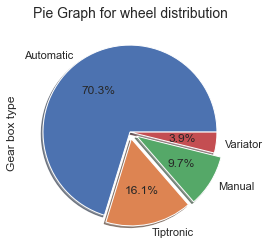

In [466]:
df['Gear box type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = [0, 0.08, 0.09, 0], shadow = True)
plt.title('Pie Graph for wheel distribution', fontdict = {'size':14})

Text(0.5, 1.0, 'Pie Graph for wheel distribution')

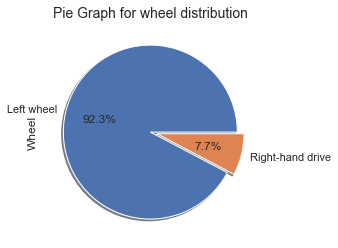

In [467]:
df['Wheel'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', explode = [0, 0.08], shadow = True)
plt.title('Pie Graph for wheel distribution', fontdict = {'size':14})

In [468]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Feature Engineering

In [469]:
# Convert all categorical data to a numerical format for model selection

def categorical_cols(data):
    cat_cols = (data.dtypes == 'object')
    new_cols = list(cat_cols[cat_cols].index)
    le = LabelEncoder()
    for i in new_cols:
        data[i] = le.fit_transform(data[i])

In [470]:
categorical_cols(df)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,114,31,1241,2010,4,1,2,63,2838,6.0,0,0,1,0,12,12
1,16621,4,8,658,2011,4,0,5,56,2960,6.0,2,0,1,0,1,8
2,8467,0,21,684,2006,3,0,5,22,3140,4.0,3,1,1,1,1,2
3,3607,512,16,661,2011,4,1,2,46,2413,4.0,0,0,1,0,14,0
4,11726,366,21,684,2014,3,1,5,22,7395,4.0,0,1,1,0,12,4


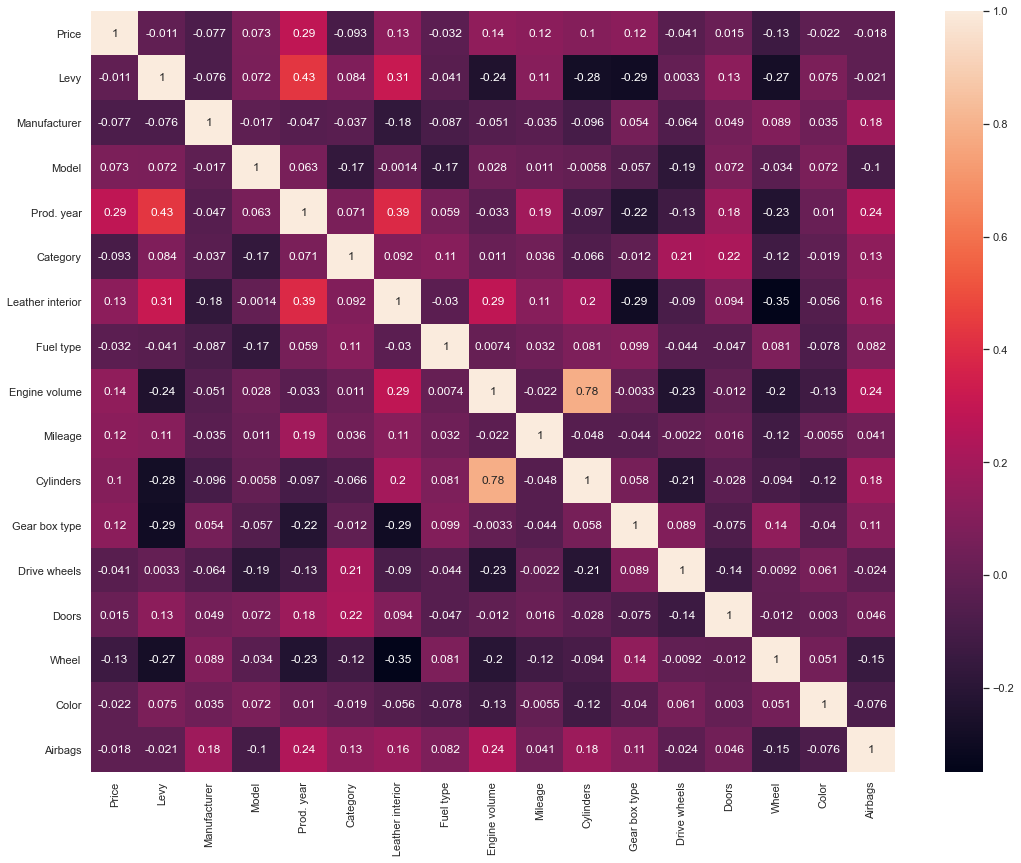

In [471]:
plt.figure(figsize = (18, 14))
sb.heatmap(df.corr(), annot = True)

#### Train and Test the Dataset

In [472]:
x = df.drop(columns = ['Price'], axis = 1)
y = df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

print('x train', x_train.shape)
print('x test', x_test.shape)
print('y train', y_train.shape)
print('y test', y_test.shape)

x train (15387, 16)
x test (3847, 16)
y train (15387,)
y test (3847,)


In [473]:
def run_experiment(model):
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    
    #plot_confusion_matrix(model, x_test, y_test, cmap = 'viridis')
    #plt.title('Confusion Matrix for' + str(model))
    #plt.show()
    
    print('Metric Evaluation of ' + str(model))
    print(f'R^2 Score : {r2_score(y_test, pred)}')
    print(f'RMSE : {np.sqrt(mean_squared_error(y_test, pred))}')
    print(f'MAE : {mean_absolute_error(y_test, pred)}')
    print()
    


In [474]:

models = {
        lr:LinearRegression(),
        dtr:DecisionTreeRegressor(),
        gbr:GradientBoostingRegressor(),
    }

for i in models.keys():
    run_experiment(i)


Metric Evaluation of LinearRegression()
R^2 Score : 0.21868988318165483
RMSE : 15946.560738179956
MAE : 10711.06217336296

Metric Evaluation of DecisionTreeRegressor()
R^2 Score : 0.5289158272025708
RMSE : 12382.392438971125
MAE : 5359.924134909231

Metric Evaluation of GradientBoostingRegressor()
R^2 Score : 0.6070145024254995
RMSE : 11309.504282410693
MAE : 6998.767263453143



##### GradientBoostingRegressor has the lowest Mean Squared Error thus the best model
##### LinearRegression has the lowest Root Mean Squared Error thus the model outperforms the rest

#### Manual Testing

In [475]:
def manual_testing(model, data):
    input_data = data
    
    input_data_to_array = np.asarray(input_data)
    
    reshape_array = input_data_to_array.reshape(1, -1)
    
    model.fit(x_train, y_train)
    
    pred = model.predict(reshape_array)
    
    print(f'The predicted value for this vehicle is : {int(pred)}')

In [492]:
raw_data = (504, 53, 248, 2017, 4, 1, 5, 28, 6407, 4.0, 0, 1, 1, 0, 14, 4)
manual_testing(lr, raw_data)

The predicted value for this vehicle is : 21115


In [493]:
raw_data = (504, 53, 248, 2017, 4, 1, 5, 28, 6407, 4.0, 0, 1, 1, 0, 14, 4)
manual_testing(gbr, raw_data)

The predicted value for this vehicle is : 31303


In [489]:
df.sample(4)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
8886,314,415,57,1153,2012,3,1,2,32,5147,4.0,0,1,1,0,14,12
3310,17249,141,27,1511,2010,4,0,5,69,1,6.0,0,0,1,0,12,0
8549,42171,504,53,248,2017,4,1,5,28,6407,4.0,0,1,1,0,14,4
18203,392,23,57,375,2018,4,1,5,36,3573,4.0,0,1,1,0,7,12
